In [5]:
import pandas as pd

In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [12]:
from google.colab import files
files.upload()

Saving twitter16m.csv to twitter16m.csv


In [13]:

df= pd.read_csv("twitter16m.csv", encoding='latin1', header=None)

In [14]:
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [15]:
# We concern only sentiment and tweets columns thai is column 0 & 5
df= df[[5,0]]

In [16]:
df.columns= ['tweets','sentiment']
df.head(3)

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0


In [17]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [18]:
sent_map= {0: 'negative', 4:'positive'}

## Word Counts

In [19]:
# Creating a column for word counts
df['word_counts']= df['tweets'].apply(lambda x: len(str(x).split()))

In [20]:
df.head(5)

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


## Character Counts

In [21]:
# Creating a column for character counts
df['char_counts']= df['tweets'].apply(lambda x: len(x))

In [22]:
df.head(2)

,tweets,sentiment,word_counts,char_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111


## Average Word Length

In [23]:
def get_avg_word_len(x):
    words= x.split()
    word_len=0
    for word in words:
        word_len=word_len + len(word)
    return word_len/len(words)  # != len(x)/len(words)

In [24]:
df['avg_word_len']= df['tweets'].apply(lambda x: get_avg_word_len(x))

In [25]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714


## STOP WORDS

In [26]:
print(STOP_WORDS)

{'then', 'n’t', 'whom', 'her', 'if', 'latterly', 'until', 'please', 'already', 'indeed', 'take', 'around', 'will', 'always', 'perhaps', 'least', 'whence', 'again', 'with', 'hence', 'forty', 'nowhere', 'himself', 'herein', 'above', 'towards', 'almost', 'wherever', 'him', 'yet', 'another', 'to', 'hereby', 'everywhere', 'between', 'yourselves', 'therefore', 'whereupon', 'most', 'these', 'keep', 'anyhow', 'or', 'made', 'quite', 'by', 'whenever', 'mine', 'call', 'become', 'noone', 'therein', 'would', 'full', 'has', 'except', 'together', 'nor', 'being', 'afterwards', 'through', 'everyone', 'which', 'every', 'i', '‘m', '‘ll', 'besides', 'a', 'thru', 'whither', 'nevertheless', 'eleven', 'could', 'fifty', 'twelve', 'within', 'cannot', 'nobody', 'an', 'from', "'d", 'over', "'m", 'less', 'on', 'but', 'four', 'many', 'only', 'my', 'give', 'just', 'now', 'even', 'along', 'anything', 'first', 'who', 'someone', 'front', 'are', 'must', 'been', 'some', 'of', 'there', 'no', 'none', 'because', 'before', 

In [27]:
# Just for understanding the next code that how many stop words included in tweets
x= "this is text data"

In [28]:
x.split()

['this', 'is', 'text', 'data']

In [29]:
[t for t in x.split() if t in STOP_WORDS]

['this', 'is']

In [30]:
len([t for t in x.split() if t in STOP_WORDS])

2

In [31]:
df['stop_words_len']=df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [32]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9


## Count #Hashtags and @Mention

In [33]:
x= "This #hashtag and this is @mention"

In [34]:
[t for t in x.split() if t.startswith('#')]

['#hashtag']

In [35]:
df['hashtags_counts']= df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_counts']= df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [36]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0


## If Numeric digits are present in tweets

In [37]:
df['numerics_count']=df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [38]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0


## Upper Case Word Count

In [39]:
df['upper_counts']= df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [40]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0


In [41]:
df.loc[96]['tweets']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

## Preprocessing and Cleaning Data

In [42]:
df['tweets']= df['tweets'].apply(lambda x: x.lower())

In [43]:
df.head(5)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


## Contraction To Expansion

In [44]:
# don't to do not , i n u, I and You ,etc

In [45]:
'''
# For contraction, there is a library, we can use this code
# import library
import contractions
# contracted text
text = 'I'll be there within 5 min. Shouldn't you be there too?
I'd love to see u there my dear. It's awesome to meet new friends.
We've been waiting for this day for so long.'

# creating an empty list
expanded_words = []
for word in text.split():
# using contractions.fix to expand the shortened words
expanded_words.append(contractions.fix(word))

expanded_text = ' '.join(expanded_words)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)
'''

"\n# For contraction, there is a library, we can use this code\n# import library\nimport contractions\n# contracted text\ntext = 'I'll be there within 5 min. Shouldn't you be there too?\nI'd love to see u there my dear. It's awesome to meet new friends.\nWe've been waiting for this day for so long.'\n\n# creating an empty list\nexpanded_words = []\nfor word in text.split():\n# using contractions.fix to expand the shortened words\nexpanded_words.append(contractions.fix(word))\n\nexpanded_text = ' '.join(expanded_words)\nprint('Original text: ' + text)\nprint('Expanded_text: ' + expanded_text)\n"

In [46]:
contractions= {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [47]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value= contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [48]:
x= "hi, i'd be happy"

In [49]:
cont_to_exp(x)

'hi, i would be happy'

In [50]:
%%time
df['tweets']= df['tweets'].apply(lambda x: cont_to_exp(x))

CPU times: user 49.1 s, sys: 109 ms, total: 49.2 s
Wall time: 49.1 s


In [51]:
df.head(3)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1


## Count and Remove emails

In [52]:
import re

In [53]:
x= 'hi my email is abdulbasit@yahoo.com'

In [54]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)

['abdulbasit@yahoo.com']

In [55]:
df['emails']=df['tweets'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x))

In [56]:
df['emails_count']=df['emails'].apply(lambda x: len(x))

In [57]:
df[df['emails_count']>0]

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.047619,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.533333,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.785714,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.111111,2,0,1,0,0,[jill@q985fm.com],1


In [58]:
# Remove email from tweets
df['tweets']=df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '',x))

In [59]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0


In [60]:
df[df['emails_count']>0].head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.150000,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole ?,0,3,31,9.000000,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.500000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.500000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.428571,7,0,1,1,0,[press@linkedin.com],1


## Count URLs and Remove it

In [61]:
x= 'hi, to watch more visit https://youtube.com/gshjskbsk'

In [62]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)

[('https', 'youtube.com', '/gshjskbsk')]

In [63]:
# length of urls in each tweet
df['urls_flag']= df['tweets'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?',x)))

In [64]:
# Testing on our x
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x)

'hi, to watch more visit '

In [65]:
# Now on tweets to remove urls
df['tweets']= df['tweets'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?','',x))

In [66]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


In [67]:
df.loc[0]['tweets']

'@switchfoot  - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

## Remove RT (Re Tweets)

In [68]:
df['tweets']=df['tweets'].apply(lambda x: re.sub('RT', '', x))

In [69]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,[],0,0


## Special Characters removal or Punctuation Removal

In [70]:
df['tweets']=df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [71]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan i dived many times for the ball manag...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Remove Multiple Spaces

In [72]:
x= 'Thanks for   watching   video'

In [73]:
" ".join(x.split())

'Thanks for watching video'

In [74]:
df['tweets']=df['tweets'].apply(lambda x: " ".join(x.split()))

In [75]:
df.head(2)

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww that is a bummer you shoulda...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,[],0,0


## Remove HTML tags

In [76]:
from bs4 import BeautifulSoup

In [77]:
x='<html><h2>Thanks for watching</h2></html>'

In [78]:
BeautifulSoup(x,'lxml').get_text()

'Thanks for watching'

In [79]:
%%time
df['tweets']=df['tweets'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

CPU times: user 6min 40s, sys: 31.4 s, total: 7min 12s
Wall time: 7min 8s


## Remove Accented Characters

In [80]:
import unicodedata

In [81]:
x= 'èaccent grave'

In [82]:
def remove_accented_chars(x):
    x= unicodedata.normalize("NFKD",x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [83]:
remove_accented_chars(x)

'eaccent grave'

In [84]:
df['tweets']=df['tweets'].apply(lambda x: remove_accented_chars(x))


# SPACY and NLP

## Remove Stop Words

In [85]:
import spacy

In [86]:
x= 'this is stop words removal code'

In [87]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop words removal code'

In [88]:
df['tweets']=df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

In [89]:
df.head()

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.052632,4,0,1,0,1,[],0,1
1,upset update facebook texting cry result schoo...,0,21,111,4.285714,9,0,0,0,0,[],0,0
2,kenichan dived times ball managed save 50 rest...,0,18,89,3.944444,7,0,1,0,1,[],0,0
3,body feels itchy like fire,0,10,47,3.700000,5,0,0,0,0,[],0,0
4,nationwideclass behaving mad,0,21,111,4.285714,10,0,1,0,1,[],0,0


## Convert into base or root form of word

In [90]:
nlp= spacy.load('en_core_web_sm')

In [91]:
x= 'kenichan dived times ball managed save 50 rest'

In [92]:
# dive= dived, time= times, manage= managed

In [93]:
#x= 'i you he she they is am are'

In [94]:
def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma= str(token.lemma_)
        if lemma =='-PRON-' or lemma =='be':
            lemma= token.text
        x_list.append(lemma)
    print(" ".join(x_list))
    

In [95]:
make_to_base(x)

kenichan dive time ball manage save 50 rest


In [96]:
# We can apply this approach to tweets but i will take hours, we are not doing right now

## Common Words Removal

In [97]:
# We are joing all data (onlly head) of tweets in text form

In [98]:
" ".join(df.head()['tweets'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [99]:
# Now joining all tweets in text
text= " ".join(df['tweets'])

In [100]:
text= text.split()

In [101]:
# Now extracting frequency of each words
freq_comm= pd.Series(text).value_counts()

In [102]:
freq_comm

good               89366
day                82299
like               77735
-                  69662
today              64512
                   ...  
kittu                  1
cryyyyyyyyyyyyy        1
newreporter            1
daygta                 1
speakinguph4h          1
Length: 787042, dtype: int64

In [103]:
# First top 20 occuring words
f20=freq_comm[:20]

In [104]:
# We will remove top 20 occuring words
df['tweets']=df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

## Rare Words Removal

In [105]:
rare20= freq_comm[-20:] #20 words having least frequency

In [106]:
rare20

andychandleruk           1
junealeesia              1
fanwalk                  1
5859                     1
colesaw                  1
seattleweekly            1
optusquot                1
easthampton              1
uhohhippos               1
tayastorm                1
zombiecaptnhook          1
anti-rheumatic           1
quotinfo-mercialsquot    1
movistar                 1
mizzdmartin              1
kittu                    1
cryyyyyyyyyyyyy          1
newreporter              1
daygta                   1
speakinguph4h            1
dtype: int64

In [107]:
rare= freq_comm[freq_comm.values==1]

In [108]:
rare

jennciv            1
darrinuser         1
clamatis           1
cacos              1
monthsyup          1
                  ..
kittu              1
cryyyyyyyyyyyyy    1
newreporter        1
daygta             1
speakinguph4h      1
Length: 535890, dtype: int64

In [109]:
# there are 535890 least frequency (1) words, we will not processed them, it will take huge time

In [110]:
# We will remove top 20 least occuring words
df['tweets']=df['tweets'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

## WORLD CLOUD VISUALIZATION

In [111]:
!pip install wordcloud

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [113]:
# We take 20000 words
x=' '.join(text[:2000])

In [114]:
len(text)

10853591

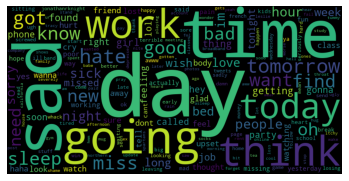

In [115]:
wc= WordCloud(width=800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [116]:
x

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing re-pierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok leslie mad meh lover exception track g

## Spelling Corrections

In [117]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 5.2 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [118]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [119]:
from textblob import TextBlob

In [120]:
x= 'thank forr waching this vidio carri'

In [121]:
x= TextBlob(x).correct()

In [122]:
x

TextBlob("thank for watching this video carry")

## TOKENIZATION

In [123]:
x= 'thanks4watching this video. please like it'

In [124]:
TextBlob(x).words

WordList(['thanks4watching', 'this', 'video', 'please', 'like', 'it'])

In [125]:
doc= nlp(x)
for token in doc:
    print(token)

thanks4watching
this
video
.
please
like
it


## LEMMATIZATION

In [126]:
x='runs run running ran'

In [127]:
from textblob import Word

In [128]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran


In [129]:
doc= nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
run


## Detect Entities using NER of Spacy

In [130]:
x='Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [131]:
doc= nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [132]:
from spacy import displacy

In [133]:
displacy.render(doc, style='ent')

'<div class="entities" style="line-height: 2.5; direction: ltr">Breaking News: \n<mark class="entity" style="background: #aa9cfc; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Donald Trump\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">PERSON</span>\n</mark>\n, the president of the \n<mark class="entity" style="background: #feca74; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    USA\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; text-transform: uppercase; vertical-align: middle; margin-left: 0.5rem">GPE</span>\n</mark>\n is looking to sign a deal to mine the moon</div>'

## Detecting Nouns

In [134]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [135]:
for noun in doc.noun_chunks:
    print(noun)

Breaking News
Donald Trump
the president
the USA
a deal
the moon


## Translation and Language Detection

In [ ]:
Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [136]:
x

'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [137]:
tb= TextBlob(x)

In [138]:
tb.detect_language()

HTTPError: ignored

In [139]:
# change in to Arabic
tb.translate(to='ar')

TextBlob("الأخبار العاجلة: يتطلع دونالد ترامب، رئيس الولايات المتحدة الأمريكية إلى توقيع صفقة لي")

## Use Inbuilt Sentiment Classifier

In [140]:
from textblob.sentiments import NaiveBayesAnalyzer

In [141]:
x= 'we all stands together to fight with corona virus. we will win together'

In [142]:
tb= TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [143]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8259779151942094, p_neg=0.17402208480578962)

In [144]:
x= 'we all are suffering from corona'

In [145]:
tb= TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [146]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8530393643704917, p_neg=0.1469606356295085)

# Advanced Text Processing

## N-Grams

In [147]:
x= 'thanks for watching'

In [148]:
tb= TextBlob(x)

In [149]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

In [150]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching'])]

## Bag of Words

In [151]:
x= ['this is first sentence', 'this is second','this is last']

In [152]:
from sklearn.feature_extraction.text import CountVectorizer

In [153]:
cv= CountVectorizer(ngram_range=(1,1))
text_counts= cv.fit_transform(x)

In [154]:
text_counts.toarray()

array([[1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]])

In [155]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'last', 'second', 'sentence', 'this']

In [156]:
bow= pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [157]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [158]:
x

['this is first sentence', 'this is second', 'this is last']

## Term Frequency

In [159]:
x

['this is first sentence', 'this is second', 'this is last']

In [160]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [161]:
bow.shape

(3, 6)

In [162]:
tf= bow.copy()

In [164]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col]=tf.loc[index, col]/sum(row[1].values)

In [165]:
tf

,first,is,last,second,sentence,this
0,0.25,0.250000,0.000000,0.000000,0.25,0.250000
1,0.00,0.333333,0.000000,0.333333,0.00,0.333333
2,0.00,0.333333,0.333333,0.000000,0.00,0.333333


## Inverse Document Frequency

In [166]:
import numpy as np

In [167]:
x_df= pd.DataFrame(x, columns=['words'])

In [168]:
x_df

,words
0,this is first sentence
1,this is second
2,this is last


In [169]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [170]:
N= bow.shape[0]
N

3

In [171]:
bb= bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [172]:
bb['is'].sum()

3

In [173]:
cols= bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [174]:
nz= []
for col in cols:
    nz.append(bb[col].sum())

In [175]:
nz

[1, 3, 1, 1, 1, 3]

In [176]:
idf= []
for index, col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [177]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

In [178]:
bow

,first,is,last,second,sentence,this
0,1,1,0,0,1,1
1,0,1,0,1,0,1
2,0,1,1,0,0,1


## TDIDF

In [179]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [180]:
tfidf=TfidfVectorizer()
x_tfidf= tfidf.fit_transform(x_df['words'])

In [181]:
x_tfidf.toarray()

array([[0.6088451 , 0.35959372, 0.        , 0.        , 0.6088451 ,
        0.35959372],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [182]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

In [183]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

# Word Embedding

## Spacy Word2Vec

In [184]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.3 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=0f103a92873ea3a46b25a94946f77cb330e3da4b93cc8eff4c8a2e9a81f41eb5
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpmezr0s/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [186]:
nlp= spacy.load('en_core_web_lg')

OSError: ignored

In [ ]:
doc=nlp('thank you! dog cat lion dfasss')

In [ ]:
for token in doc:
    print(token.text, token.has_vector)

In [ ]:
token.vector

In [ ]:
token.vector.shape

In [ ]:
nlp('cat').vector.shape

In [ ]:
for token1 in doc:http://localhost:8888/notebooks/Documents/NLP%20from%20Youtube/13-%20Complete%20Text%20Processing/Complete-Text-processing.ipynb#Word-Embedding
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

# Machine Learning Models for Text Classification

In [187]:
df.shape

(1600000, 13)

In [188]:
# Using only 2000 data
df0=df[df['sentiment']==0].sample(2000)
df4=df[df['sentiment']==4].sample(2000)

In [189]:
# combinig them
dfr= df0.append(df4)

In [190]:
dfr.shape

(4000, 13)

In [191]:
dfr

,tweets,sentiment,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails,emails_count,urls_flag
95104,broken computertwitter miss,0,5,38,6.600000,1,0,0,0,0,[],0,0
778426,waht boring,0,4,18,3.500000,1,0,0,0,0,[],0,0
217901,imcudi tried coachella party couldnt details m...,0,24,118,3.916667,15,0,1,0,0,[],0,0
372597,clean bathroom,0,8,39,3.875000,4,0,0,0,0,[],0,0
795132,surprised 280 followers gives crp cirvical cancer,0,16,91,4.687500,8,0,0,1,0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378256,kellystraycat doi hope tweetshe gets,4,11,81,6.090909,5,0,1,0,0,[],0,0
1290051,kissjeanie hey follow look forward ur tweets,4,13,73,4.615385,3,0,1,0,1,[],0,0
877147,cwcelebreporter apart comittee,4,7,47,5.714286,2,0,1,0,0,[],0,0
1150745,follow streetsmusic,4,2,21,9.500000,0,0,1,0,1,[],0,0


In [193]:
# dropping tweets, sentiment and emails columns
dfr_feat= dfr.drop(labels=['tweets','sentiment','emails'],axis=1).reset_index(drop=True)

In [194]:
dfr_feat

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails_count,urls_flag
0,5,38,6.600000,1,0,0,0,0,0,0
1,4,18,3.500000,1,0,0,0,0,0,0
2,24,118,3.916667,15,0,1,0,0,0,0
3,8,39,3.875000,4,0,0,0,0,0,0
4,16,91,4.687500,8,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3995,11,81,6.090909,5,0,1,0,0,0,0
3996,13,73,4.615385,3,0,1,0,1,0,0
3997,7,47,5.714286,2,0,1,0,0,0,0
3998,2,21,9.500000,0,0,1,0,1,0,0


In [195]:
y= dfr['sentiment']

In [196]:
from sklearn.feature_extraction.text import CountVectorizer

In [197]:
cv= CountVectorizer()
text_counts= cv.fit_transform(dfr['tweets'])

In [198]:
text_counts.toarray().shape

(4000, 9709)

In [199]:
dfr_bow= pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [200]:
dfr_bow

,0630,0708,09,0h,0mgiitzree,0mnislasher,10,100,1000,1000nok,...,zip,zoebakes,zoebeck,zofie,zombie,zombieninja,zone,zoo,zutradio,zz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ML ALGORITHMS

In [201]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [202]:
sgd= SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr= LogisticRegression(random_state=42, max_iter=200)
lgrcv= LogisticRegressionCV(cv=2, random_state=42, max_iter=1000)
svm= LinearSVC(random_state=42, max_iter=200)
rfc= RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [203]:
clf= {'SGD':sgd,'LGR':lgr,'LGR-CV':lgrcv,'SVM':svm, 'RFC':rfc}

In [204]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [207]:
def classify(X,y):
    scaler= MinMaxScaler(feature_range=(0,1))
    X=scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac= accuracy_score(y_test, y_pred)
        print(key, " ---->", ac)

In [208]:
%%time
classify(dfr_bow, y)

SGD  ----> 0.65875
LGR  ----> 0.69375
LGR-CV  ----> 0.70375
SVM  ----> 0.67875
RFC  ----> 0.675
CPU times: user 7min 59s, sys: 3.9 s, total: 8min 3s
Wall time: 4min 16s


## Manual Feature

In [209]:
dfr_feat.head(2)

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails_count,urls_flag
0,5,38,6.6,1,0,0,0,0,0,0
1,4,18,3.5,1,0,0,0,0,0,0


In [210]:
%%time
classify(dfr_feat,y)

SGD  ----> 0.585
LGR  ----> 0.59375
LGR-CV  ----> 0.59875
SVM  ----> 0.6025
RFC  ----> 0.535
CPU times: user 1.95 s, sys: 535 ms, total: 2.49 s
Wall time: 1.54 s


## Manual + BOW

In [211]:
X= dfr_feat.join(dfr_bow)
X

,word_counts,char_counts,avg_word_len,stop_words_len,hashtags_counts,mentions_counts,numerics_count,upper_counts,emails_count,urls_flag,...,zip,zoebakes,zoebeck,zofie,zombie,zombieninja,zone,zoo,zutradio,zz
0,5,38,6.600000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,18,3.500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24,118,3.916667,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8,39,3.875000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,91,4.687500,8,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,11,81,6.090909,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,13,73,4.615385,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,7,47,5.714286,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,2,21,9.500000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
%%time
classify(X,y)

SGD  ----> 0.67125
LGR  ----> 0.69125
LGR-CV  ----> 0.68875
SVM  ----> 0.67375
RFC  ----> 0.66125
CPU times: user 2min 14s, sys: 4.74 s, total: 2min 19s
Wall time: 1min 13s


## TFIDF

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
dfr.shape

(4000, 13)

In [215]:
tfidf= TfidfVectorizer()
X= tfidf.fit_transform(dfr['tweets'])

In [216]:
%%time
classify(pd.DataFrame(X.toarray()),y)

SGD  ----> 0.6525
LGR  ----> 0.69875
LGR-CV  ----> 0.71
SVM  ----> 0.67
RFC  ----> 0.685
CPU times: user 3min 36s, sys: 2.78 s, total: 3min 38s
Wall time: 1min 53s


## Word2Vec

In [217]:
def get_vec(x):
    doc= nlp(x)
    return doc.vector.reshape(1,-1)

In [218]:
%%time
dfr['vec']= dfr['tweets'].apply(lambda x: get_vec(x))

CPU times: user 34.7 s, sys: 204 ms, total: 34.9 s
Wall time: 34.7 s


In [221]:
X= np.concatenate(dfr['vec'].to_numpy(),axis=0)

ValueError: ignored

In [ ]:
X.shape

In [ ]:
classify(pd.DataFrame(X),y)

In [ ]:
# Prediction
def predict_w2v(x):
    for key in clf.keys():
        y_pred= clf[key].predict(get_vec(x))
        print(key, "--->", y_pred)

In [ ]:
predict_w2v("Hi, thanks for watching this video. please like and subscribe")

In [ ]:
predict_w2v("please let me know if you want more videos")